In [30]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context = "notebook", style = "whitegrid")

In [2]:
fields=["date",
        "extraction.pressureApplied", "extraction.retractionPressureApplied",
        "extraction.timeExtractionStart", "extraction.timeExtractionEnd",
        "extraction.timeRetractionStart", "extraction.timeRetractionEnd",
        "recording.pipetteR", "extraction.postPatch", "roi_minor"]


json_df = pd.read_csv("//allen\programs/celltypes/workgroups/279/Patch-Seq/compiled-jem-data/jem_metadata.csv",usecols=fields)
#json_df = json_df[json_df['status'] == 'SUCCESS']

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
json_df

,date,extraction.postPatch,extraction.pressureApplied,extraction.retractionPressureApplied,extraction.timeExtractionEnd,extraction.timeExtractionStart,extraction.timeRetractionEnd,extraction.timeRetractionStart,recording.pipetteR,roi_minor
0,2017-10-02 10:46:00 -0700,nucleus_present,-23.4,-22.9,NaN,11:09:35 -0700,NaN,NaN,5.8,layer 2/3
1,2017-10-02 10:54:00 -0700,nucleus_present,-30.0,-30.0,NaN,11:09:00 -0700,NaN,NaN,5.2,layer 5
2,2017-10-02 10:54:00 -0700,nucleus_present,-30.0,-30.0,NaN,11:36:46 -0700,NaN,NaN,6.0,layer 5
3,2017-10-02 10:54:00 -0700,nucleus_absent,-30.0,-30.0,NaN,12:02:06 -0700,NaN,NaN,4.9,layer 5
4,2017-10-02 11:30:00 -0700,nucleus_present,-30.0,-30.0,NaN,11:54:58 -0700,NaN,NaN,4.0,layer 4
...,...,...,...,...,...,...,...,...,...,...
15550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
start_date = "2018-01-01"
end_date = "2021-12-31"

mask = (json_df["date"] > start_date) & (json_df["date"] <= end_date)
json_df = json_df.loc[mask]
json_df.sort_values(["date"], inplace=True)

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
json_df.tail()

,date,extraction.postPatch,extraction.pressureApplied,extraction.retractionPressureApplied,extraction.timeExtractionEnd,extraction.timeExtractionStart,extraction.timeRetractionEnd,extraction.timeRetractionStart,recording.pipetteR,roi_minor
12958,2021-01-27 16:08:01 -0800,nucleus_present,-71.0,-71.0,17:34:03 -0800,17:26:21 -0800,17:38:05 -0800,NaN,7.2,NaN
12959,2021-01-27 16:08:01 -0800,nucleus_present,-71.0,-71.0,16:34:42 -0800,16:24:38 -0800,16:37:50 -0800,NaN,4.1,NaN
12961,2021-01-27 16:33:54 -0800,nucleus_present,-63.0,-65.0,17:41:35 -0800,17:39:02 -0800,17:47:14 -0800,NaN,4.2,NaN
12960,2021-01-27 16:33:54 -0800,nucleus_present,-46.0,-60.0,16:44:36 -0800,16:42:28 -0800,16:52:19 -0800,NaN,4.1,NaN
12962,2021-01-27 16:33:54 -0800,nucleus_absent,-68.0,-68.0,19:11:54 -0800,19:10:46 -0800,19:21:08 -0800,NaN,4.8,NaN


In [6]:
json_df["ext_ret_time"] = pd.to_datetime(json_df["extraction.timeRetractionEnd"]) - pd.to_datetime(json_df["extraction.timeExtractionStart"])
json_df["ext_ret_time"] = (json_df["ext_ret_time"].astype("timedelta64[s]"))/60

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
json_df

,date,extraction.postPatch,extraction.pressureApplied,extraction.retractionPressureApplied,extraction.timeExtractionEnd,extraction.timeExtractionStart,extraction.timeRetractionEnd,extraction.timeRetractionStart,recording.pipetteR,roi_minor,ext_ret_time
1108,2018-01-02 13:05:10 -0800,nucleus_present,-19.5,-19.5,13:24:28 -0800,13:24:03 -0800,13:26:12 -0800,NaN,4.4,layer 5,2.150000
1109,2018-01-02 13:33:14 -0800,nucleus_present,-20.0,-20.0,14:13:57 -0800,14:13:14 -0800,14:15:55 -0800,NaN,3.9,layer 2/3,2.683333
1110,2018-01-02 13:33:14 -0800,nucleus_present,-20.0,-20.0,13:48:06 -0800,13:47:17 -0800,13:50:20 -0800,NaN,4.6,layer 2/3,3.050000
1111,2018-01-02 13:45:51 -0800,nucleus_present,-19.2,-19.2,14:04:00 -0800,14:03:28 -0800,14:05:21 -0800,NaN,4.1,layer 2/3,1.883333
1112,2018-01-02 14:28:00 -0800,nucleus_present,-19.5,-19.5,14:42:42 -0800,14:41:59 -0800,14:44:08 -0800,NaN,3.4,layer 5,2.150000
...,...,...,...,...,...,...,...,...,...,...,...
12958,2021-01-27 16:08:01 -0800,nucleus_present,-71.0,-71.0,17:34:03 -0800,17:26:21 -0800,17:38:05 -0800,NaN,7.2,NaN,11.733333
12959,2021-01-27 16:08:01 -0800,nucleus_present,-71.0,-71.0,16:34:42 -0800,16:24:38 -0800,16:37:50 -0800,NaN,4.1,NaN,13.200000
12961,2021-01-27 16:33:54 -0800,nucleus_present,-63.0,-65.0,17:41:35 -0800,17:39:02 -0800,17:47:14 -0800,NaN,4.2,NaN,8.200000
12960,2021-01-27 16:33:54 -0800,nucleus_present,-46.0,-60.0,16:44:36 -0800,16:42:28 -0800,16:52:19 -0800,NaN,4.1,NaN,9.850000


In [8]:
json_df["roi_minor"].unique()

array(['layer 5', 'layer 2/3', 'layer 4', 'layer 6a', 'layer 1',
       'layer 6b', 'layer 2', 'layer 3', 'Shell', 'Core', 'layer 6',
       'layer 3b', 'layer 3c', 'layer 3a', nan, 'CA1', 'CA3', 'CA2', 'DG',
       'Ca', 'CLA', 'VMH', 'Gpi', 'MH', 'LH', 'SNc', 'SNr', 'CP', 'MD',
       'VAL', 'ACB', 'Gpe'], dtype=object)

[Text(0, 0.5, 'Negative Pressure (mbar)'), Text(0.5, 0, 'Region')]

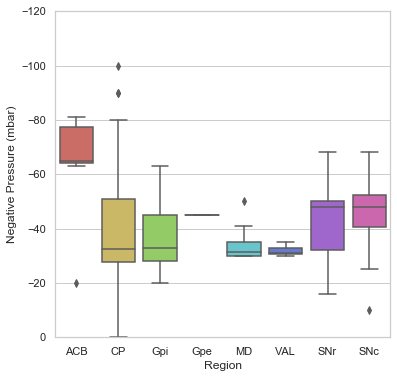

In [31]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x="roi_minor", y="extraction.pressureApplied", data=json_df,
                 order=["ACB", "CP", "Gpi", "Gpe", "MD", "VAL", "SNr", "SNc"], palette="hls")
ax.set(ylim=(0, -120))
ax.set(xlabel = "Region", ylabel = "Negative Pressure (mbar)")

[Text(0, 0.5, 'Ext/Ret Duration (min)'), Text(0.5, 0, 'Region')]

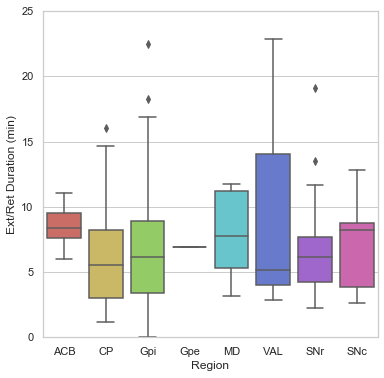

In [35]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x="roi_minor", y="ext_ret_time", data=json_df,
                 order=["ACB", "CP", "Gpi", "Gpe", "MD", "VAL", "SNr", "SNc"], palette="hls")
ax.set(ylim=(0, 25))
ax.set(xlabel = "Region", ylabel = "Ext/Ret Duration (min)")

<Figure size 432x432 with 0 Axes>

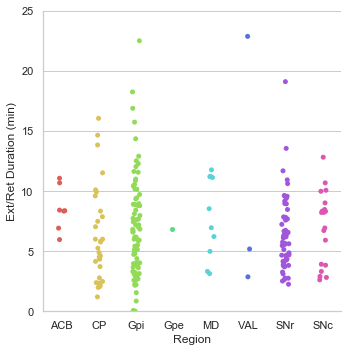

In [39]:
plt.figure(figsize=(6,6))
ax = sns.catplot(x="roi_minor", y="ext_ret_time", data=json_df,
                 order=["ACB", "CP", "Gpi", "Gpe", "MD", "VAL", "SNr", "SNc"], palette="hls")
ax.set(ylim=(0, 25))
ax.set(xlabel = "Region", ylabel = "Ext/Ret Duration (min)")

<Figure size 432x432 with 0 Axes>

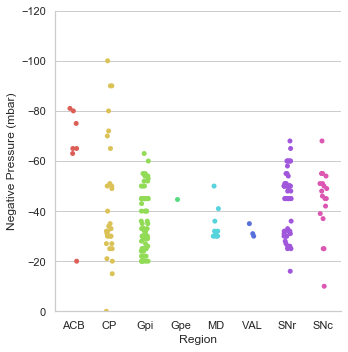

In [41]:
plt.figure(figsize=(6,6))
ax = sns.catplot(x="roi_minor", y="extraction.pressureApplied", data=json_df,
                 order=["ACB", "CP", "Gpi", "Gpe", "MD", "VAL", "SNr", "SNc"], palette="hls")
ax.set(ylim=(0, -120))
ax.set(xlabel = "Region", ylabel = "Negative Pressure (mbar)")